In [159]:
import json
from pprint import pprint
import pandas as pd
import matplotlib

with open('../data/list.json') as f:
    articles = json.load(f)
    
df = pd.DataFrame.from_dict(articles, orient='index')
df = df[['given_title', 'resolved_title', 'time_added', 'word_count', 'lang', 'time_to_read', 'excerpt']]
df.head()

,given_title,resolved_title,time_added,word_count,lang,time_to_read,excerpt
1001106631,"Elon Musk, Superintelligence, and Maximizing S...","Elon Musk, Superintelligence, and Maximizing S...",1497271008,2219,,NaN,"From July 31st to August 2nd, the Google Quad ..."
1005441886,What are the most productive ways to spend tim...,What are the most productive ways to spend tim...,1466856252,631,en,3.0,Disclaimer: This is might be seem a little dif...
1005845211,How (and Why) SpaceX Will Colonize Mars - Wait...,How (and Why) SpaceX Will Colonize Mars,1499438202,44368,en,202.0,This is Part 3 of a four-part series on Elon M...
1011240024,"33 strony, które zrobią z ciebie geniusza","33 strony, które zrobią z ciebie geniusza",1466856232,467,,NaN,Albert Einstein jest autorem znanego powiedzen...
1013289460,Machine Learning for Programmers: Leap from de...,Machine Learning for Programmers,1466856220,4128,en,19.0,Leap From Developer To Machine Learning Practi...


In [160]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')
matplotlib.rcParams['figure.figsize'] = (15, 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x141b9e438>]],
      dtype=object)

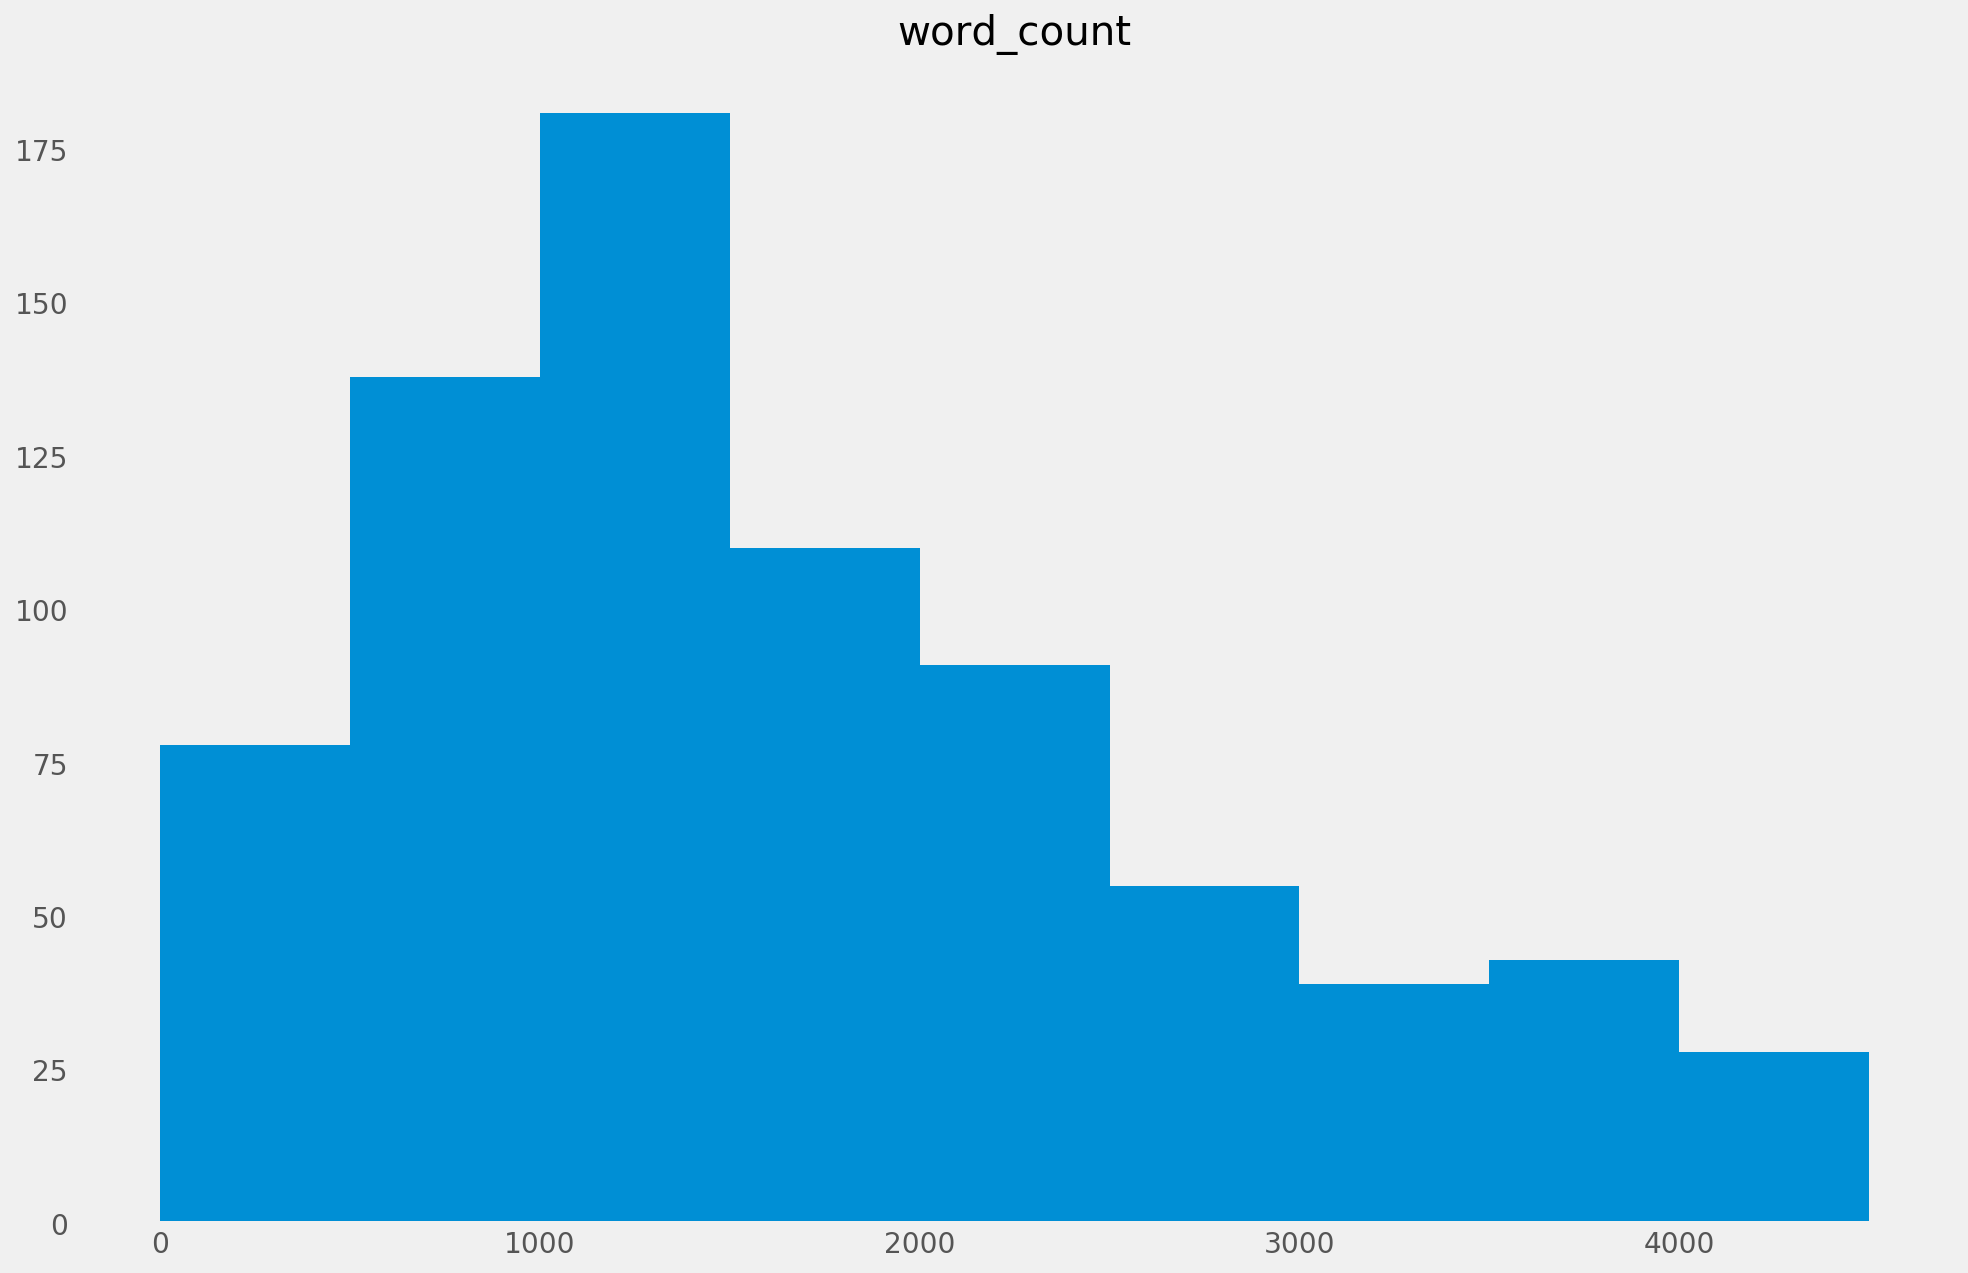

In [161]:
df[['word_count']] = df[['word_count']].apply(pd.to_numeric)
df.loc[(df['word_count'] < 5000) & (df['word_count'] > 10)]\
.hist('word_count', grid=False, bins=range(0, 5000, 500))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x141be26a0>]],
      dtype=object)

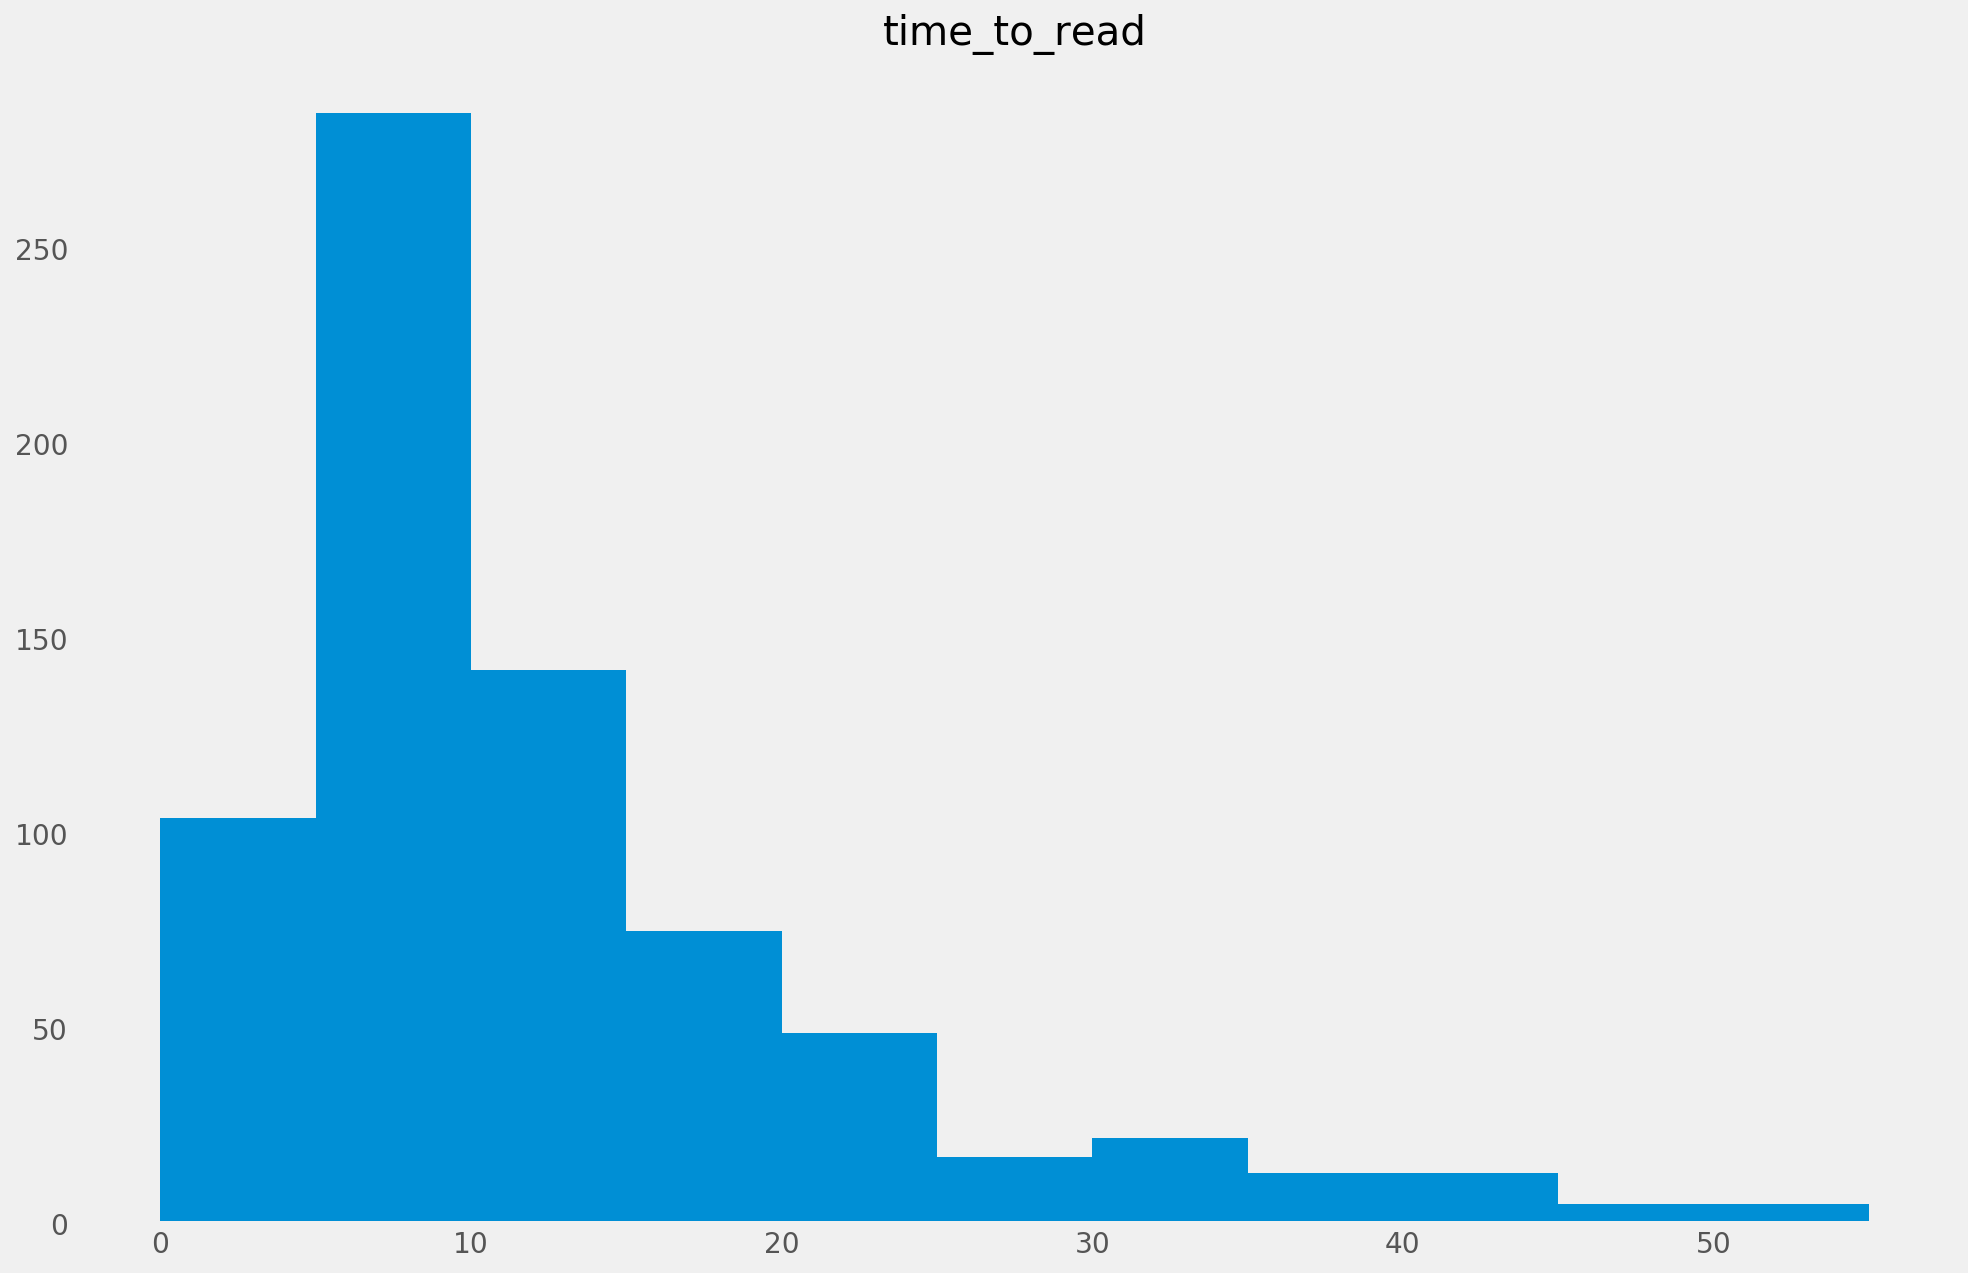

In [162]:
df.loc[(df['time_to_read'] < 60)]\
.hist('time_to_read', grid=False, bins=range(0, 60, 5))

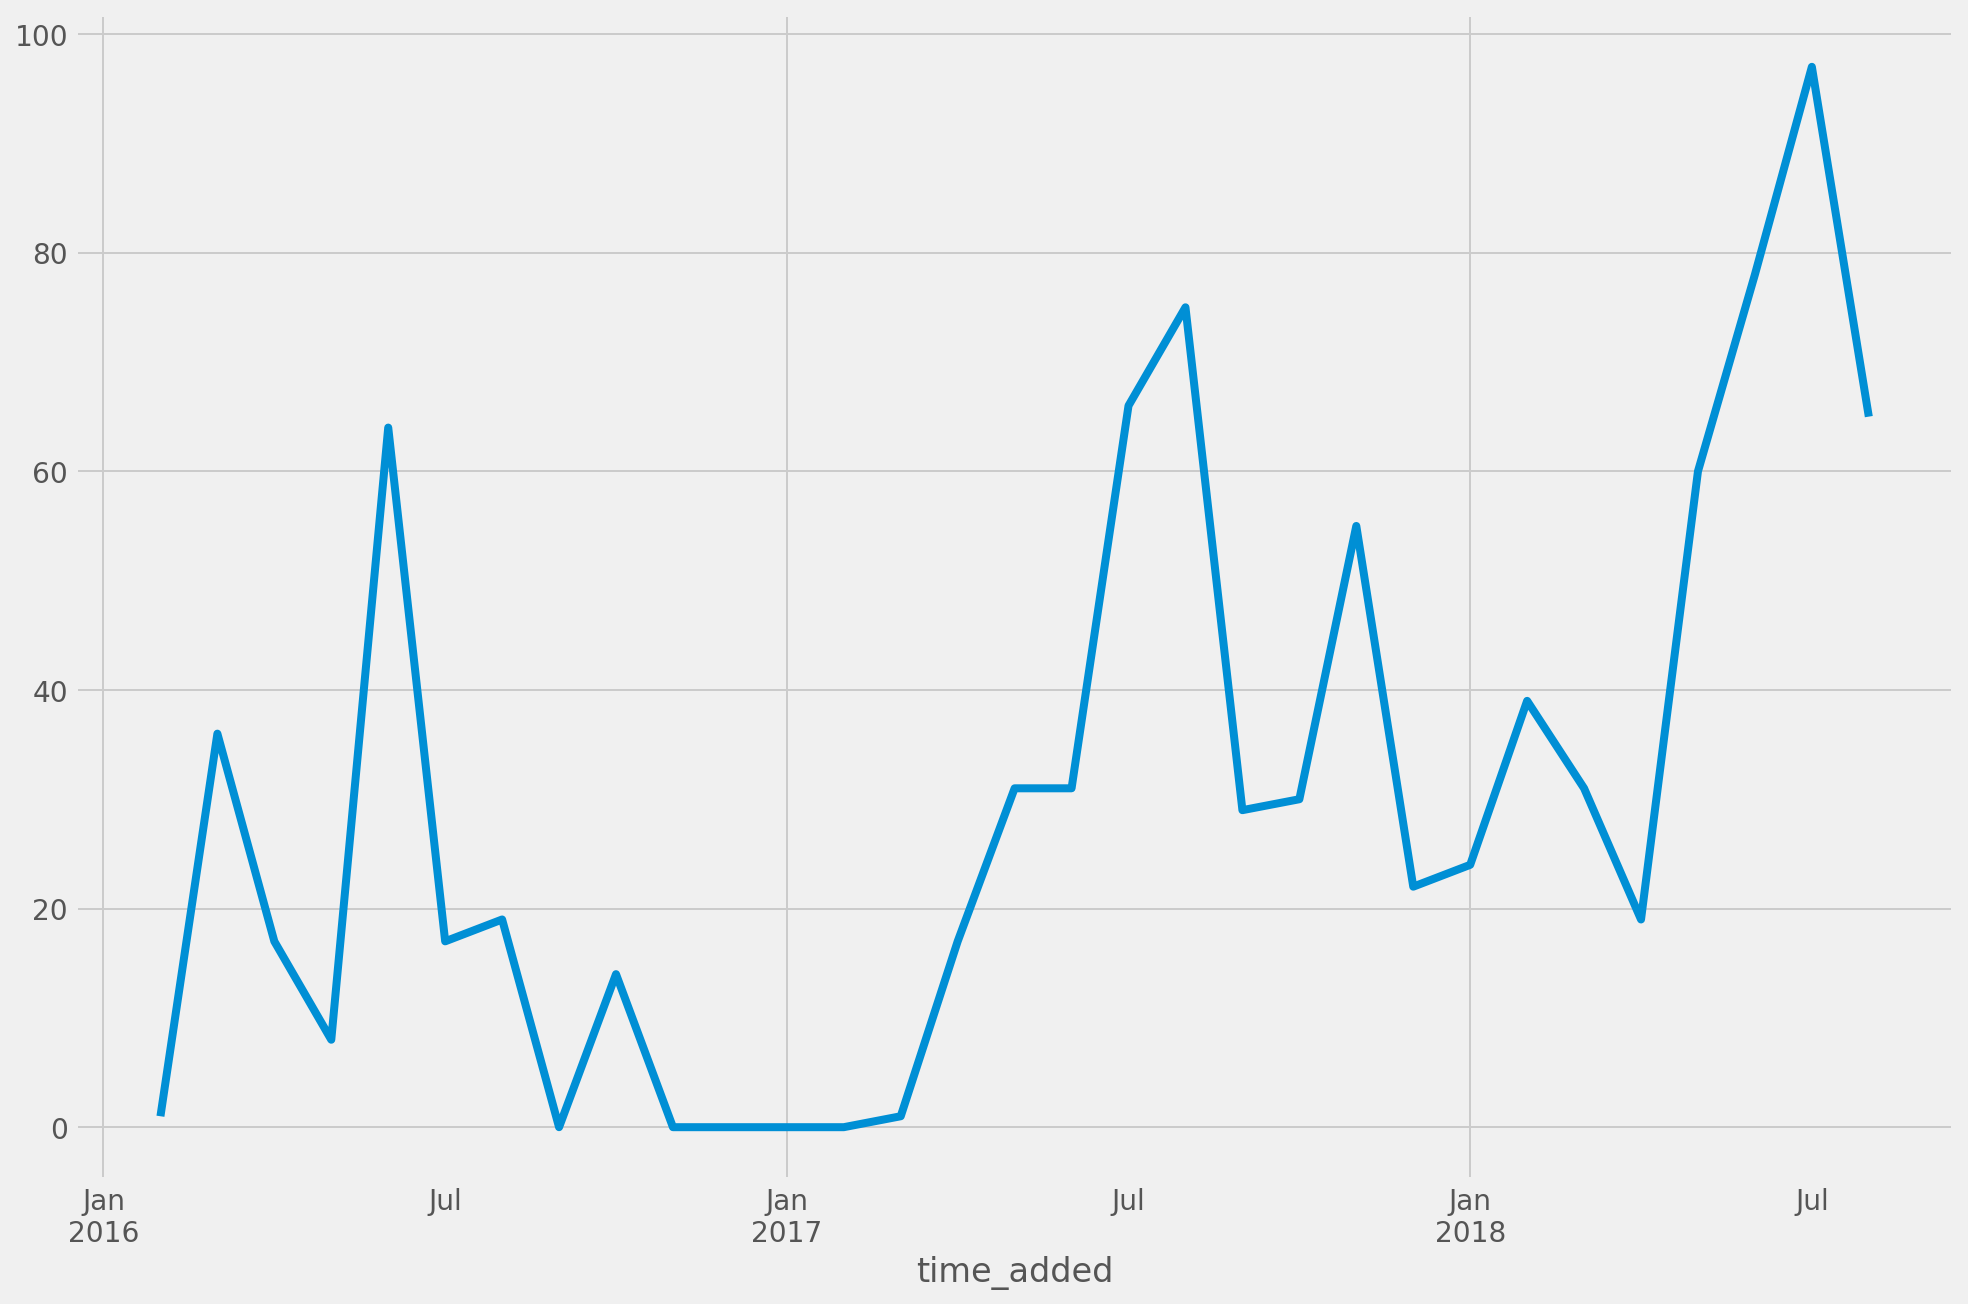

In [163]:
df['time_added'] = pd.to_datetime(df['time_added'], unit='s')
df.set_index('time_added').groupby(pd.Grouper(freq='M')).size().plot()